In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\prach\Downloads\archive\Chocolate Sales (2).csv")
df.head(10)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184
5,Van Tuxwell,India,Smooth Sliky Salty,06/06/2022,"$5,376.00",38
6,Oby Sorrel,UK,99% Dark & Pure,25/01/2022,"$13,685.00",176
7,Gunar Cockshoot,Australia,After Nines,24/03/2022,"$3,080.00",73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,20/04/2022,"$3,990.00",59
9,Brien Boise,Australia,99% Dark & Pure,04/07/2022,"$2,835.00",102


In [48]:
df.isnull().sum()


Sales Person        0
Country             0
Product             0
Date                0
Amount              0
Boxes Shipped       0
Month               0
revenue_per_box     0
Estimated profit    0
dtype: int64

In [4]:
df.describe()

,Boxes Shipped
count,3282.000000
mean,164.666971
std,124.024736
min,1.000000
25%,71.000000
50%,137.000000
75%,232.000000
max,778.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


# Data Cleaning

In [6]:
# Converting Amount (String) to int 
df["Amount"] = df["Amount"].replace('[\$,]', '', regex=True).astype(float)
df.head(10)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,13685.0,184
5,Van Tuxwell,India,Smooth Sliky Salty,06/06/2022,5376.0,38
6,Oby Sorrel,UK,99% Dark & Pure,25/01/2022,13685.0,176
7,Gunar Cockshoot,Australia,After Nines,24/03/2022,3080.0,73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,20/04/2022,3990.0,59
9,Brien Boise,Australia,99% Dark & Pure,04/07/2022,2835.0,102


In [8]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.head(10)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184
5,Van Tuxwell,India,Smooth Sliky Salty,2022-06-06,5376.0,38
6,Oby Sorrel,UK,99% Dark & Pure,2022-01-25,13685.0,176
7,Gunar Cockshoot,Australia,After Nines,2022-03-24,3080.0,73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,2022-04-20,3990.0,59
9,Brien Boise,Australia,99% Dark & Pure,2022-07-04,2835.0,102


# TOTAL SALES

In [9]:
total_revenue = df["Amount"].sum()
print(total_revenue)

19791571.860000003


In [10]:
total_boxes_shipped = df["Boxes Shipped"].sum()
print(total_boxes_shipped)

540437


# Counrty Wise Anylysis


In [11]:
import matplotlib.pyplot as plt

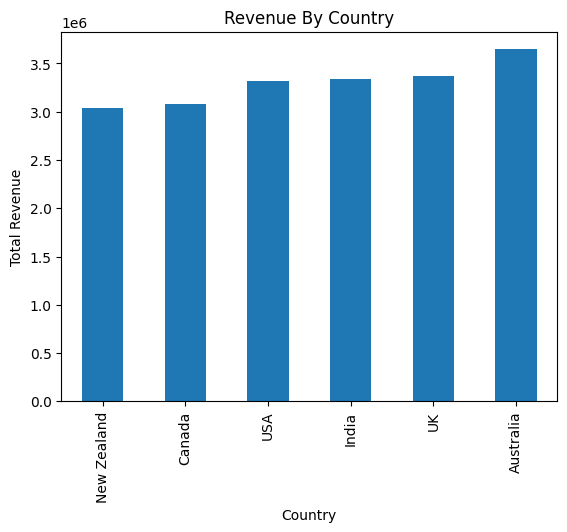

In [12]:
revenue_by_country = df.groupby('Country')['Amount'].sum().sort_values()
revenue_by_country.plot(kind='bar')
plt.title("Revenue By Country")
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()

# Product Wise Anylysis

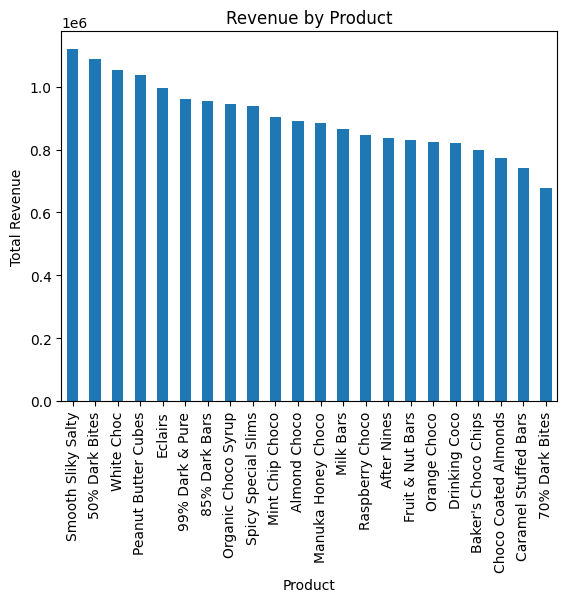

In [13]:
revenue_by_product = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)
revenue_by_product.plot(kind='bar')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.show()

# Average Revenue Per Order

In [14]:
avg_revenue_per_order = df['Amount'].mean()
print(avg_revenue_per_order)

6030.338775137113


# Monthly Trend Report

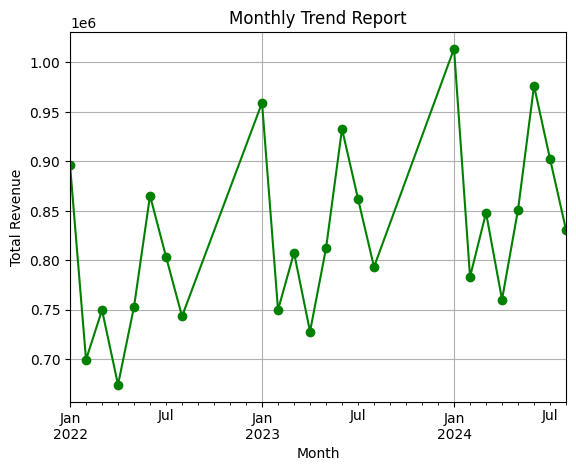

In [15]:
df['Month'] = df["Date"].dt.to_period('M')
revenue_report = df.groupby('Month')['Amount'].sum()
revenue_report.plot(kind='line', marker='o', color='green')
plt.grid()
plt.title('Monthly Trend Report')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

# Country's Stable Performance

In [16]:
country_volatility = df.groupby('Country')['Amount'].std()
print(country_volatility)

Country
Australia      4086.100882
Canada         4148.893930
India          4668.592783
New Zealand    4219.007194
UK             4469.286795
USA            4753.879947
Name: Amount, dtype: float64


# Average boxes Shipped per Sale

In [17]:
avg_boxes = df.groupby('Product')['Boxes Shipped'].mean().sort_values(ascending=False)
print(avg_boxes.head())

Product
Caramel Stuffed Bars    206.015504
70% Dark Bites          194.634921
Mint Chip Choco         186.288889
Manuka Honey Choco      175.822222
Baker's Choco Chips     174.373984
Name: Boxes Shipped, dtype: float64


# Revenue Per Box

In [18]:
df["revenue_per_box"] = df["Amount"] / df["Boxes Shipped"]
df.head(10)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,revenue_per_box
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022-01,29.555556
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,2022-08,84.000000
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022-07,49.461538
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022-04,37.210526
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022-02,74.375000
5,Van Tuxwell,India,Smooth Sliky Salty,2022-06-06,5376.0,38,2022-06,141.473684
6,Oby Sorrel,UK,99% Dark & Pure,2022-01-25,13685.0,176,2022-01,77.755682
7,Gunar Cockshoot,Australia,After Nines,2022-03-24,3080.0,73,2022-03,42.191781
8,Jehu Rudeforth,New Zealand,50% Dark Bites,2022-04-20,3990.0,59,2022-04,67.627119
9,Brien Boise,Australia,99% Dark & Pure,2022-07-04,2835.0,102,2022-07,27.794118


# Highest revenue per box by product

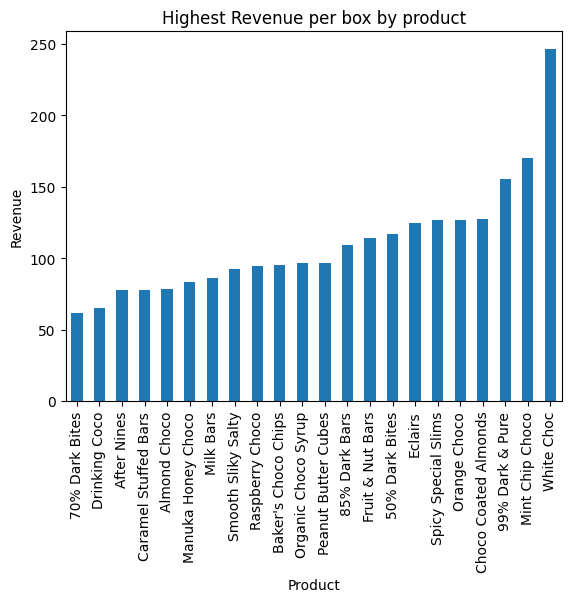

In [19]:
product_revenue = df.groupby('Product')['revenue_per_box'].mean().sort_values()
product_revenue.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Highest Revenue per box by product')
plt.show()

# Highest Revenue per box by country

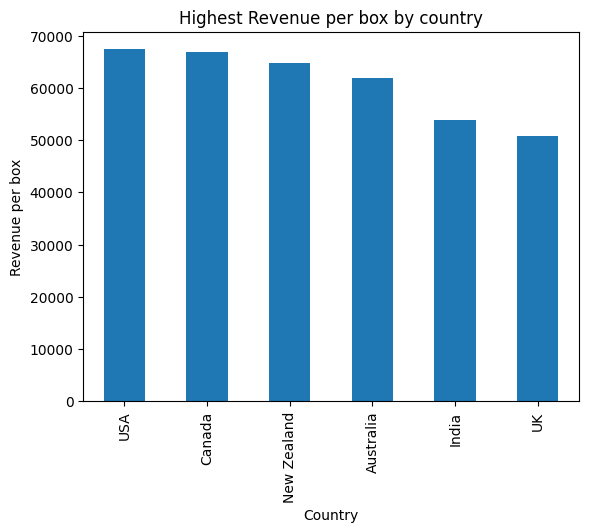

In [20]:
country_revenue = df.groupby('Country')['revenue_per_box'].sum().sort_values(ascending=False)
country_revenue.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Revenue per box')
plt.title('Highest Revenue per box by country')
plt.show()

# Profit Estimation

In [24]:
df["Estimated profit"] = df["Amount"] * 0.4


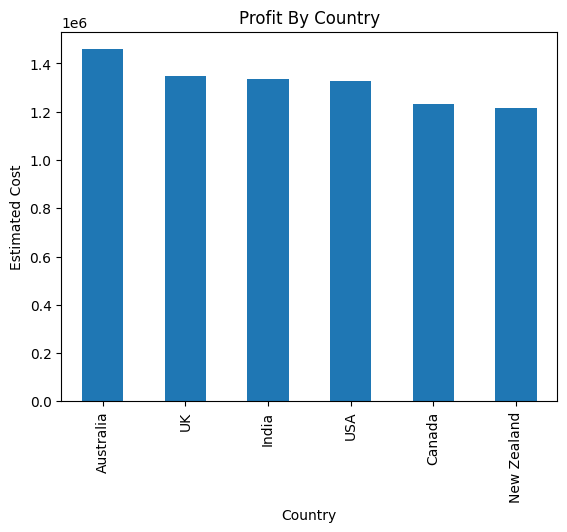

In [28]:
# Profit By Country
profit_by_country = df.groupby('Country')["Estimated profit"].sum().sort_values(ascending=False)
profit_by_country.plot(kind='bar')
plt.title("Profit By Country")
plt.xlabel('Country')
plt.ylabel('Estimated Cost')
plt.show()

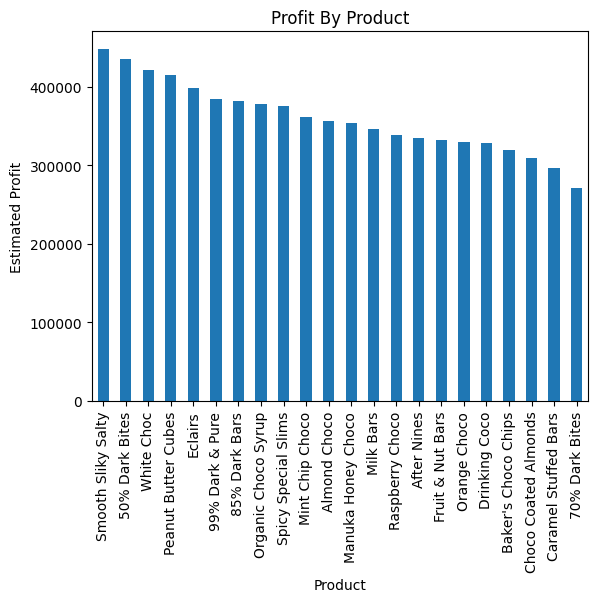

In [30]:
# Profit by Product
profit_by_product = df.groupby('Product')['Estimated profit'].sum().sort_values(ascending=False)
profit_by_product.plot(kind='bar')
plt.title("Profit By Product")
plt.xlabel('Product')
plt.ylabel('Estimated Profit')
plt.show()

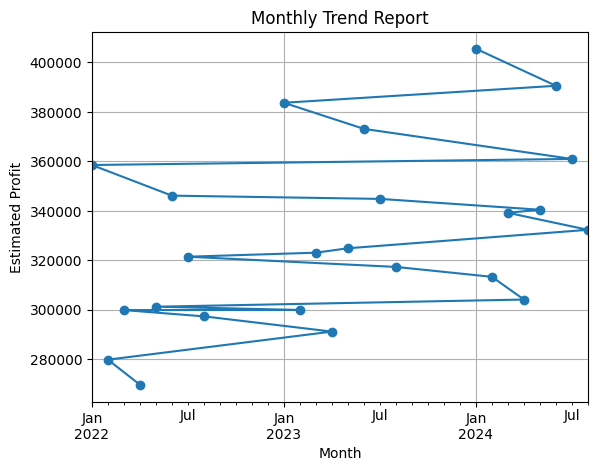

In [35]:
# Monthly Trend Report
revenue_monthly = df.groupby('Month')['Estimated profit'].sum().sort_values()
revenue_monthly.plot(kind='line', marker='o')
plt.grid()
plt.title('Monthly Trend Report')
plt.xlabel('Month')
plt.ylabel('Estimated Profit')
plt.show()

# Correlation Anylysis

In [40]:
corr_value = df[["Amount", "Boxes Shipped"]].corr()
corr_value

,Amount,Boxes Shipped
Amount,1.000000,-0.013154
Boxes Shipped,-0.013154,1.000000


# Revenue is not driven by shipment volume.The company appears to rely more on pricing strategy and product mix rather than bulk sales.

# Top Customer Anylysis

In [43]:
top_customers = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(5)
top_customers

Sales Person
Ches Bonnell       1022599.96
Oby Sorrel         1017204.12
Madelene Upcott    1010028.72
Kelci Walkden      1002929.10
Brien Boise         997326.48
Name: Amount, dtype: float64

In [49]:
df.shape

(3282, 9)

# Amount Prediction Using ML

In [52]:
df_ml = df.copy()
df_ml["Month"] = df_ml["Date"].dt.month
df_ml = df_ml[["Amount", "Boxes Shipped", "Country", "Product", "Month"]]
df_ml.head(5)

,Amount,Boxes Shipped,Country,Product,Month
0,5320.0,180,UK,Mint Chip Choco,1
1,7896.0,94,India,85% Dark Bars,8
2,4501.0,91,India,Peanut Butter Cubes,7
3,12726.0,342,Australia,Peanut Butter Cubes,4
4,13685.0,184,UK,Peanut Butter Cubes,2


In [53]:
df_ml.shape

(3282, 5)

In [58]:
# Converting categorical data into numerical 
df_encoded = pd.get_dummies(df_ml, columns=["Country", "Product"], drop_first=True)
df_encoded.head(5)
df_encoded.shape

(3282, 29)

In [60]:
# Seprating features and target
x = df_encoded.drop("Amount", axis=1)
y = df["Amount"]
print(x.shape)
print(y.shape)

(3282, 28)
(3282,)


In [64]:
# Splitting Data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print("Trainning Shape : ", x_train.shape)
print("Testing Shape : ", x_test.shape)

Trainning Shape :  (2625, 28)
Testing Shape :  (657, 28)


In [66]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print("Model Trained Successfully")

Model Trained Successfully


In [68]:
# Making Predictions
y_pred = model.predict(x_test)
y_pred[:5]

array([7406.11505277, 6554.96177045, 5755.09848942, 6188.95462727,
       6014.23837437])

In [70]:
# Model performance
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print("Mean Absolute Error : ", mae)
print("R2 Score : ", r2_score)

Mean Absolute Error :  3422.972108852981
R2 Score :  -0.005139371129528003


In [74]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators = 100, 
    random_state = 42
)
rf_model.fit(x_train, y_train)
print("Random Forest Trained Successfully")

Random Forest Trained Successfully


In [75]:
# Making Predictions
rf_pred = rf_model.predict(x_test)
rf_pred[:5]

array([6387.9464    , 4231.706     , 7997.8548    , 3809.68851667,
       2564.32220476])

In [79]:
# Model Performance
from sklearn.metrics import mean_absolute_error, r2_score
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("Mean Absolute Error : ", rf_mae)
print("R2 Score : ", rf_r2)

Mean Absolute Error :  1800.4556301894738
R2 Score :  0.6090051178302704


### Visualization

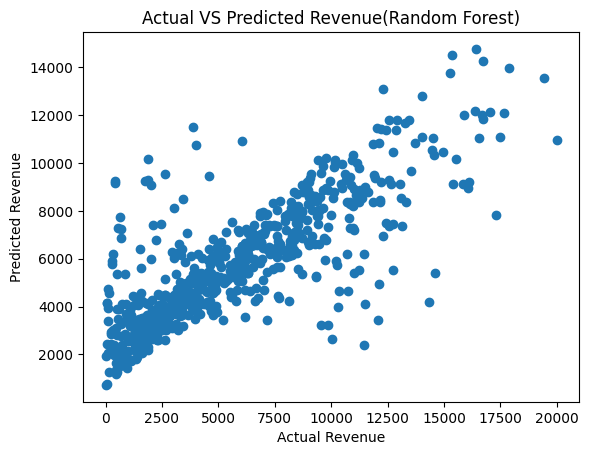

In [81]:
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual VS Predicted Revenue(Random Forest)')
plt.show()

# Feature Importance

In [84]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index = x.columns
).sort_values(ascending=False)
feature_importance.head(10)

Boxes Shipped                  0.338243
Month                          0.150881
Country_India                  0.037327
Country_UK                     0.036283
Country_New Zealand            0.035973
Country_USA                    0.033679
Country_Canada                 0.025844
Product_Organic Choco Syrup    0.024379
Product_Smooth Sliky Salty     0.024230
Product_Milk Bars              0.019408
dtype: float64

## Baseline Model – Linear Regression

#### Result:
#### R^2 ~ -0.005
#### MAE ~ 3423

### Insight:
#### Linear Regression failed to capture the relationship between features and revenue.
#### This suggests revenue does not follow a simple linear pattern.

# Improved Model – Random Forest

#### Result:
#### R^2 ~ 0.60
#### MAE ~ 1800

### Insight:
#### Random Forest significantly improved prediction accuracy, indicating that revenue depends on complex, non-linear interactions between country, product type, and shipment volume.
#### This suggests revenue does not follow a simple linear pattern.

# Business Insights Section

### Australia gives stable revenue performance.

### USA generates high revenue but has higher volatility

### Revenue is not volume-driven; pricing strategy plays a key role.

### January shows seasonal revenue spike.

### Caramel Stuffed Bars perform well in volume sales.

### Company has customer concentration risk.

### Revenue in this chocolate business is not purely driven by shipment volume. Instead, pricing strategy and product-category variations play a significant role.
### Non-linear modeling techniques (Random Forest) capture these interactions better than linear models.

### Boxes Shipped (33.8%) is the most influential factor in predicting revenue.
### Month (15%) also plays a significant role, indicating seasonal effects.
### Revenue varies moderately across countries like India, UK, New Zealand, USA, and Canada.
### Certain products such as Organic Choco Syrup and Smooth Silky Salty contribute more to revenue variation than others.